# 합성곱 신경망

In [1]:
import numpy as np

In [2]:
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

In [3]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [4]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1)))  # (4,)(4,1) => (1,)

[63]
[48]
[49]
[28]
[21]
[20]


In [5]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r), end = " ")  # (4,)(4,) => ()

63 48 49 28 21 20 

In [6]:
from scipy.signal import convolve

In [7]:
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [8]:
from scipy.signal import correlate

In [9]:
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [10]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [11]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [12]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], 
              [0, 0]])

In [13]:
from scipy.signal import correlate2d

correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [14]:
np.flip(w)

array([[0, 0],
       [0, 2]])

In [15]:
from scipy.signal import convolve2d

convolve2d(x, w, mode='valid')

array([[10, 12],
       [16, 18]])

In [16]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [17]:
import tensorflow as tf
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
# print(image)
print(image.numpy())

(1, 3, 3, 1)
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


In [18]:
print(image.numpy().reshape(3,3))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


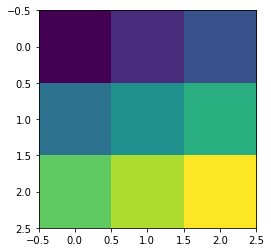

In [19]:
plt.imshow(image.numpy().reshape(3,3))

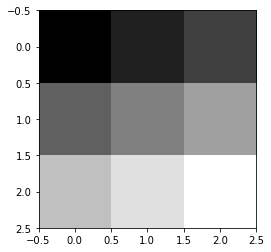

In [20]:
plt.imshow(image.numpy().reshape(3,3), cmap='gray')

In [21]:
a = np.array( [1, 2] )
print(a)
print(len(a))
print(a.ndim)
print(a.shape)

[1 2]
2
1
(2,)


In [22]:
a = np.array( [ [1, 2], 
                [3, 4] ]  )
print(a)
print(len(a))
print(len(a[0]))
print(len(a[1]))
print(a.ndim)
print(a.shape)

[[1 2]
 [3 4]]
2
2
2
2
(2, 2)


In [23]:
a = np.array( [ [ [1,2],[3,4] ], [[5,6],[7,8]] ] )
print(a)
print(len(a))
print(len(a[0]))
print(len(a[1]))
print(len(a[0][0]))
print(a.ndim)
print(a.shape)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
2
2
2
2
3
(2, 2, 2)


In [24]:
a = np.array( [ [[[1],[2]],[[3],[4]]], 
                [[[5],[6]],[[7],[8]]]  ]  )
print(a) 
print(len(a)) # 2
print(len(a[0]))# 2
print(len(a[1])) # 2
print(len(a[0][0])) # 2
print(len(a[0][0][0])) # 1
print(a.ndim) # 4
print(a.shape) # (2,2,2,1)

[[[[1]
   [2]]

  [[3]
   [4]]]


 [[[5]
   [6]]

  [[7]
   [8]]]]
2
2
2
2
1
4
(2, 2, 2, 1)


In [25]:
a = np.array( [[[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]]]  )
print(len(a)) # 1
print(len(a[0]))# 3
print(len(a[0][0])) # 3
print(len(a[0][0][0])) # 1
print(a.ndim) # 4
print(a.shape) # (1,3,3,1)

1
3
3
1
4
(1, 3, 3, 1)


image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


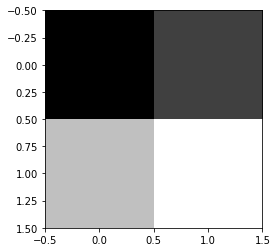

In [26]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


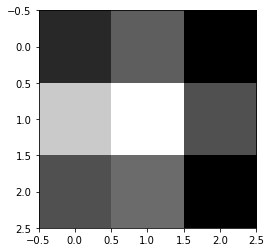

In [27]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')

In [28]:
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
# print(weight)
temp = np.transpose(weight, (3,0,1,2))
for data in temp:
    print(data.reshape(2,2))

weight.shape (2, 2, 1, 3)
[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[-1. -1.]
 [-1. -1.]]


conv2d.shape (1, 2, 2, 3)
[[12. 16.]
 [24. 28.]]
[[120. 160.]
 [240. 280.]]
[[-12. -16.]
 [-24. -28.]]


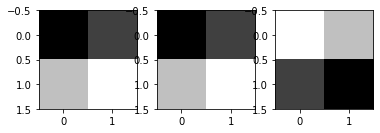

In [29]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(2,2))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(2,2), cmap='gray')
plt.show()

In [30]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1,1,1],[2,2,2],[3,3,3]],
                      [[4,4,4],[5,5,5],[6,6,6]],
                      [[7,7,7],[8,8,8],[9,9,9]]]], dtype=np.float32)
print(image.shape)
weight = np.array([[[[1],[2],[3]],[[1],[2],[3]]],[[[1],[2],[3]],[[1],[2],[3]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d)
# feature_maps = np.swapaxes(conv2d, 0, 3)
# for i, feature_map in enumerate(feature_maps):
#     print(feature_map.reshape(3,3))
#     plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
# plt.show()

(1, 3, 3, 3)
weight.shape (2, 2, 3, 1)
conv2d.shape (1, 3, 3, 1)
tf.Tensor(
[[[[ 72.]
   [ 96.]
   [ 54.]]

  [[144.]
   [168.]
   [ 90.]]

  [[ 90.]
   [102.]
   [ 54.]]]], shape=(1, 3, 3, 1), dtype=float32)


In [31]:
a = np.array([[1,2],
              [3,4]])
print(a)
print(np.swapaxes(a, 0, 1))
print(a.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]


In [32]:
import numpy as np
a = np.arange(15).reshape(3,5)
print(np.swapaxes(a, 0, 1))
print(a.T)
print(np.transpose(a, (1,0)))

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [33]:
import numpy as np
a = np.arange(24).reshape(2,3,4)

print(a)
print(np.swapaxes(a,0,2))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]


In [34]:
import numpy as np
a = np.arange(24).reshape(2,3,4)

print(a)
print(np.swapaxes(a,0,1))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]]


In [35]:
import numpy as np
a = np.arange(16).reshape(2,2,2,2)
print(a)
print(np.transpose(a,(2,3,0,1)))

[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]
[[[[ 0  4]
   [ 8 12]]

  [[ 1  5]
   [ 9 13]]]


 [[[ 2  6]
   [10 14]]

  [[ 3  7]
   [11 15]]]]


In [36]:
import numpy as np
a = np.arange(16).reshape(2,2,2,2)
print(a)
print(np.transpose(a,(3,2,1,0)))

[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]
[[[[ 0  8]
   [ 4 12]]

  [[ 2 10]
   [ 6 14]]]


 [[[ 1  9]
   [ 5 13]]

  [[ 3 11]
   [ 7 15]]]]


In [37]:
image = tf.constant(  [[ 
                         [[1,0,1],[1,1,1],[1,1,1],[0,0,1],[0,1,0]], 
                         [[0,0,1],[1,1,1],[1,1,1],[1,1,1],[0,0,0]], 
                         [[0,0,0],[0,0,0],[1,1,0],[1,1,1],[1,0,1]], 
                         [[0,0,0],[0,0,1],[1,1,1],[1,1,1],[0,1,0]], 
                         [[0,1,0],[1,1,1],[1,1,1],[0,0,0],[0,0,0]] 
                      ]],     dtype=np.float32)

print(image.shape)
maps = np.swapaxes(image, 0, 3)
for i, map in enumerate(maps):
    print(map.reshape(5,5))

(1, 5, 5, 3)
[[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]
[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]]
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]


In [38]:
weight = np.array( [ 
                     [[[1],[0],[-1]], [[0],[-1],[0]], [[1],[0],[0]]],
                     [[[0],[-1],[0]], [[1],[1],[1]], [[0],[-1],[0]]],
                     [[[1],[1],[0]], [[0],[-1],[0]], [[1],[0],[-1]]]
                   ] )

print(weight.shape)
# maps = np.swapaxes(weight, 1, 2)
# maps = np.swapaxes(maps, 0, 1)
maps = np.transpose(weight, (2,0,1,3))
print(maps.shape)
for i, map in enumerate(maps):
    print(map.reshape(3,3))
    
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))

(3, 3, 3, 1)
(3, 3, 3, 1)
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
conv2d.shape (1, 3, 3, 1)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]


In [39]:
import numpy as np
conv2d = np.array([[[[1,2],[3,4]],[[5,6],[7,8]]],[[[9,10],[11,12]],[[13,14],[15,16]]]])
feature_maps = np.swapaxes(conv2d, 0, 3)
print(feature_maps)

for i, feature in enumerate(feature_maps):
    print(i, feature)

[[[[ 1  9]
   [ 3 11]]

  [[ 5 13]
   [ 7 15]]]


 [[[ 2 10]
   [ 4 12]]

  [[ 6 14]
   [ 8 16]]]]
0 [[[ 1  9]
  [ 3 11]]

 [[ 5 13]
  [ 7 15]]]
1 [[[ 2 10]
  [ 4 12]]

 [[ 6 14]
  [ 8 16]]]


In [40]:
import tensorflow as tf
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant(  [[ 
                         [[1,0,1],[1,1,1],[1,1,1],[0,0,1],[0,1,0]], 
                         [[0,0,1],[1,1,1],[1,1,1],[1,1,1],[0,0,0]], 
                         [[0,0,0],[0,0,0],[1,1,0],[1,1,1],[1,0,1]], 
                         [[0,0,0],[0,0,1],[1,1,1],[1,1,1],[0,1,0]], 
                         [[0,1,0],[1,1,1],[1,1,1],[0,0,0],[0,0,0]] 
                      ]],     dtype=np.float32)

print(image.shape)
weight = np.array( [ 
                     [[[1,1],[0,1],[-1,-1]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[0,0]]],
                     [[[0,0],[-1,0],[0,0]], [[1,1],[1,1],[1,1]], [[0,0],[-1,0],[0,0]]],
                     [[[1,1],[1,1],[0,0]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[-1,-1]]]
                   ] )

print("weight.shape", weight.shape)

# maps = np.transpose(weight, (2,3,0,1))
# for map in maps:
#     for filter in map:
#        print(filter)

weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=2, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for feature_map in feature_maps:
    print(feature_map.reshape(3,3))


(1, 5, 5, 3)
weight.shape (3, 3, 3, 2)
conv2d.shape (1, 3, 3, 2)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]
[[7. 5. 7.]
 [2. 6. 7.]
 [5. 7. 8.]]


# 풀링 연산

In [41]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(image.shape)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4.]]]]


In [42]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [43]:
image = np.arange(16).reshape(1,4,4,1)
image = tf.constant(image, dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[ 5.]
   [ 7.]]

  [[13.]
   [15.]]]]


<class 'numpy.ndarray'>
(28, 28)


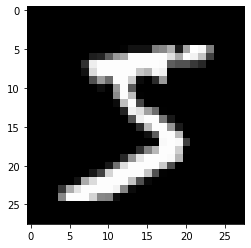

(60000, 28, 28)


In [44]:
import tensorflow as tf
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
mnist = tensorflow.keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
print(type(img))
print(img.shape)
plt.imshow( img, cmap='gray')
plt.show()
print(train_images.shape)

(1, 28, 28, 1)
conv2d.shape (1, 26, 26, 5)


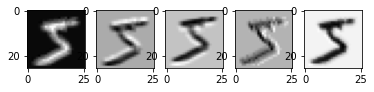

In [45]:
img = img.reshape(-1,28,28,1)
print(img.shape)
img_tf = tf.convert_to_tensor(img)
# print(img_tf.shape)
# print(img_tf)
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
print(weight_init)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, padding='valid',
                                kernel_initializer=weight_init)(img_tf)  # weight.shape = (3,3,1,5)
print("conv2d.shape", conv2d.shape) # (1,26,26,5)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(26,26), cmap='gray')
plt.show()

(1, 13, 13, 5)


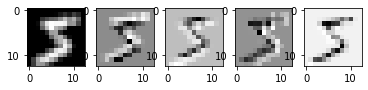

In [46]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid')(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(13,13), cmap='gray')
plt.show()

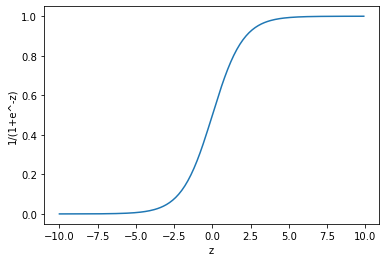

In [47]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

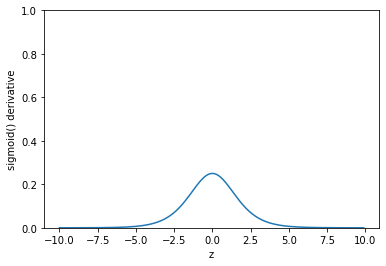

In [48]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ sigmoid(z)*(1-sigmoid(z)) for z in zs]
plt.plot(zs, gs)
plt.ylim(0,1)
plt.xlabel('z')
plt.ylabel('sigmoid() derivative')
plt.show()

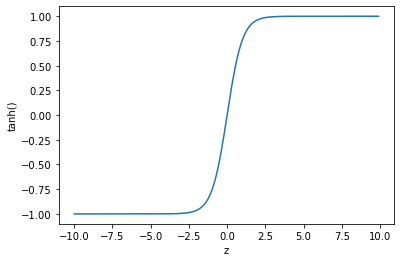

In [49]:
zs = np.arange(-10., 10., 0.1)
gs = [ np.tanh(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

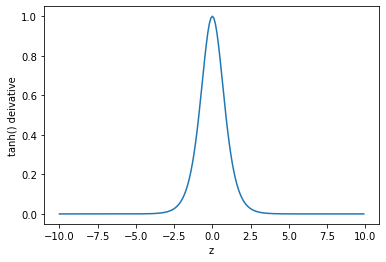

In [50]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ (1-np.tanh(z))*(1+np.tanh(z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh() deivative')
plt.show()

In [51]:
def relu(x):
    return np.maximum(x, 0)

In [52]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

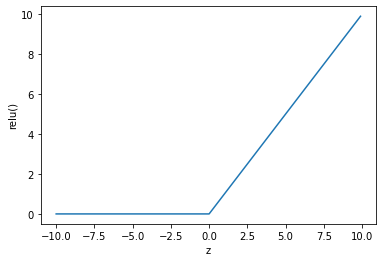

In [53]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ relu(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('relu()')
plt.show()

In [54]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

In [70]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
        print('x.shape',x.shape)                      # (128,28,28,1)
        print('self.conv_w.shape',self.conv_w.shape)  # (3,3,1,10)
        print('self.conv_w',self.conv_w)
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
        print('c_out.shape',c_out.shape)              # (128,28,28,10)
        print('c_out',c_out)
        r_out = tf.nn.relu(c_out)
        print('r_out.shape',r_out.shape)              # (128,28,28,10)
        print('r_out',r_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
        print('p_out.shape',p_out.shape)             # (128,14,14,10)
        print('p_out',p_out)
        f_out = tf.reshape(p_out, [x.shape[0], -1])
        print('f_out.shape',f_out.shape)             # (128,1960)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # (128,1960)(1960,100)+(100,)
        a1 = tf.nn.relu(z1)                          # (128,100)
        z2 = tf.matmul(a1, self.w2) + self.b2        # (128,100)(100,10)+(10,) => (128,10)
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
 
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [56]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = x ** 3 + 2 * x + 5

# 그래디언트를 계산합니댜.
print(tape.gradient(y, x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [57]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = tf.nn.softmax(x)

# 그래디언트를 계산합니다.
print(tape.gradient(y, x))

tf.Tensor([9.99540153e-18 2.71703183e-17 7.38565826e-17], shape=(3,), dtype=float64)


In [71]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [73]:
print(y_train[0])
print(y_train.shape)

6
(48000,)


In [74]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [75]:
print(y_train_encoded[0])
print(y_train_encoded.shape)
print(x_train.shape)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(48000, 10)
(48000, 28, 28)


In [76]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [77]:
print(x_train.shape)
print(x_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [78]:
x_train = x_train / 255
x_val = x_val / 255

In [79]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .x.shape (128, 28, 28, 1)
self.conv_w.shape (3, 3, 1, 10)
self.conv_w <tf.Variable 'Variable:0' shape=(3, 3, 1, 10) dtype=float32, numpy=
array([[[[-0.10476257, -0.08250546,  0.0633387 , -0.06630582,
           0.22395903,  0.24389225,  0.03928235,  0.07859764,
          -0.1567775 , -0.13292818]],

        [[-0.04129905, -0.1658701 , -0.04170381,  0.07147563,
           0.00281447, -0.21470019, -0.18251377,  0.0235033 ,
          -0.07505009,  0.03953692]],

        [[ 0.14675763, -0.05171634, -0.11690919,  0.14146385,
           0.14943281, -0.14069477,  0.03162658, -0.02451615,
          -0.14135155, -0.09220769]]],


       [[[ 0.01569164,  0.13612908, -0.21894398,  0.22079054,
          -0.21015283,  0.02644897,  0.16320577, -0.04567872,
          -0.1299605 ,  0.16588819]],

        [[ 0.11724317, -0.01384617, -0.09147599, -0.17692834,
           0.052481  , -0.20296104,  0.00714162, -0.14004736,
           0.11813837, -0.05203381]],

        [[-0.09998336, -0.15861967, -0.

p_out tf.Tensor(
[[[[2.23962023e-04 0.00000000e+00 4.02824196e-04 ... 3.29973809e-05
    0.00000000e+00 0.00000000e+00]
   [1.01017952e-03 0.00000000e+00 9.15259006e-04 ... 1.21511670e-03
    0.00000000e+00 0.00000000e+00]
   [4.22446430e-02 0.00000000e+00 1.82377994e-02 ... 3.55215103e-04
    1.52987440e-03 0.00000000e+00]
   ...
   [1.13304779e-01 3.23059782e-02 8.97564983e-04 ... 1.94106251e-04
    5.99475652e-02 0.00000000e+00]
   [9.65616666e-04 3.91794631e-04 4.02824196e-04 ... 3.29973809e-05
    0.00000000e+00 5.09287929e-04]
   [2.23962023e-04 0.00000000e+00 4.02824196e-04 ... 3.29973809e-05
    0.00000000e+00 0.00000000e+00]]

  [[2.23962023e-04 0.00000000e+00 4.02824196e-04 ... 3.29973809e-05
    0.00000000e+00 0.00000000e+00]
   [2.75863474e-03 0.00000000e+00 0.00000000e+00 ... 1.08118646e-03
    0.00000000e+00 3.23573418e-04]
   [1.57634944e-01 0.00000000e+00 2.08351072e-02 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   ...
   [1.69903427e-01 1.07336946e-01 0.0000

p_out.shape (128, 14, 14, 10)
p_out tf.Tensor(
[[[[0.00000000e+00 0.00000000e+00 2.15775543e-03 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [7.53529277e-03 0.00000000e+00 2.15775543e-03 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [2.06130836e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.07795767e-03 0.00000000e+00]
   ...
   [2.19824687e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.36052212e-02 0.00000000e+00]
   [1.37558719e-02 1.26036666e-02 2.15775543e-03 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 2.15775543e-03 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 2.15775543e-03 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [7.53529277e-03 0.00000000e+00 2.15775543e-03 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [2.12209262e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   ...
   [2.0085

p_out.shape (128, 14, 14, 10)
p_out tf.Tensor(
[[[[2.24093441e-07 1.88078029e-05 3.74012347e-03 ... 2.71032652e-04
    0.00000000e+00 0.00000000e+00]
   [2.24093441e-07 1.88078029e-05 3.74012347e-03 ... 2.71032652e-04
    0.00000000e+00 0.00000000e+00]
   [1.33130210e-03 1.88078029e-05 4.59942734e-03 ... 2.71032652e-04
    0.00000000e+00 0.00000000e+00]
   ...
   [3.00268619e-03 8.80923471e-04 4.86709643e-03 ... 7.35835289e-04
    6.98309916e-04 0.00000000e+00]
   [2.24093441e-07 1.88078029e-05 3.74012347e-03 ... 2.71032652e-04
    0.00000000e+00 0.00000000e+00]
   [2.24093441e-07 1.88078029e-05 3.74012347e-03 ... 2.71032652e-04
    0.00000000e+00 0.00000000e+00]]

  [[2.24093441e-07 1.88078029e-05 3.74012347e-03 ... 2.71032652e-04
    0.00000000e+00 0.00000000e+00]
   [2.24093441e-07 1.88078029e-05 3.74012347e-03 ... 2.71032652e-04
    0.00000000e+00 0.00000000e+00]
   [6.75187027e-03 0.00000000e+00 4.08384483e-03 ... 2.34588259e-03
    0.00000000e+00 0.00000000e+00]
   ...
   [1.3930

p_out.shape (128, 14, 14, 10)
p_out tf.Tensor(
[[[[0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04
    0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04
    0.0000000e+00 0.0000000e+00]]

  [[0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04
    0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 8.5208330e-06 4.7183121e-03 ... 3.0540195e-04


r_out.shape (128, 28, 28, 10)
r_out tf.Tensor(
[[[[1.90992476e-04 0.00000000e+00 6.45481050e-03 ... 5.92840428e-04
    0.00000000e+00 0.00000000e+00]
   [1.90992476e-04 0.00000000e+00 6.45481050e-03 ... 5.92840428e-04
    0.00000000e+00 0.00000000e+00]
   [1.90992476e-04 0.00000000e+00 6.45481050e-03 ... 5.92840428e-04
    0.00000000e+00 0.00000000e+00]
   ...
   [2.71591954e-02 0.00000000e+00 2.35323831e-02 ... 0.00000000e+00
    3.94374656e-04 0.00000000e+00]
   [3.23734991e-03 0.00000000e+00 5.56883402e-02 ... 1.65403206e-02
    4.85222526e-02 0.00000000e+00]
   [7.53140226e-02 2.10759751e-02 0.00000000e+00 ... 0.00000000e+00
    3.91052552e-02 0.00000000e+00]]

  [[1.90992476e-04 0.00000000e+00 6.45481050e-03 ... 5.92840428e-04
    0.00000000e+00 0.00000000e+00]
   [1.90992476e-04 0.00000000e+00 6.45481050e-03 ... 5.92840428e-04
    0.00000000e+00 0.00000000e+00]
   [1.90992476e-04 0.00000000e+00 6.45481050e-03 ... 5.92840428e-04
    0.00000000e+00 0.00000000e+00]
   ...
   [1.5328

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [67]:
import matplotlib.pyplot as plt

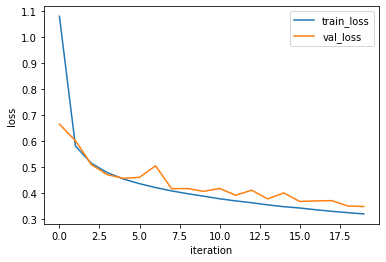

In [68]:
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [69]:
cn.score(x_val, y_val_encoded)

0.88125

In [ ]:
class Connector:
    def __enter__(self):
        print('DB 연결함')
        
    def __exit__(self, type, value, tb):
        print('DB 연결 끊음')

with  Connector()   as   db:
    print('DB 작업중...')
    

## 케라스로 합성곱 신경망 모델을 만들기

In [80]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [81]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [82]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
__________________________________________________

In [83]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4559 - accuracy: 0.8384 - val_loss: 0.3341 - val_accuracy: 0.8841
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3125 - accuracy: 0.8884 - val_loss: 0.2968 - val_accuracy: 0.8937
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2648 - accuracy: 0.9026 - val_loss: 0.2716 - val_accuracy: 0.9032
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2340 - accuracy: 0.9147 - val_loss: 0.2557 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2068 - accuracy: 0.9231 - val_loss: 0.2683 - val_accuracy: 0.9036
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1847 - accuracy: 0.9313 - val_loss: 0.2481 - val_accuracy: 0.9139
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1652 - accuracy: 0.9391 - val_loss: 0.2690 - val_accuracy:

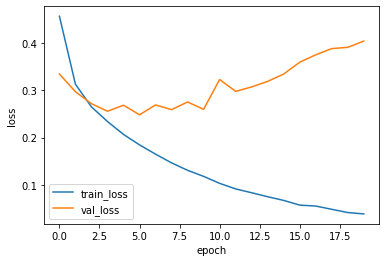

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

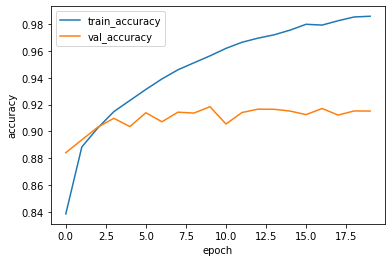

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [87]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [88]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1960)              0         
                                                                 
 dropout (Dropout)           (None, 1960)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               196100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [89]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5036 - accuracy: 0.8209 - val_loss: 0.3430 - val_accuracy: 0.8802
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3662 - accuracy: 0.8657 - val_loss: 0.3058 - val_accuracy: 0.8879
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3309 - accuracy: 0.8778 - val_loss: 0.2891 - val_accuracy: 0.8972
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3053 - accuracy: 0.8859 - val_loss: 0.2696 - val_accuracy: 0.9026
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2867 - accuracy: 0.8925 - val_loss: 0.2574 - val_accuracy: 0.9072
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2703 - accuracy: 0.8978 - val_loss: 0.2516 - val_accuracy: 0.9068
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2559 - accuracy: 0.9039 - val_loss: 0.2391 - val_accuracy:

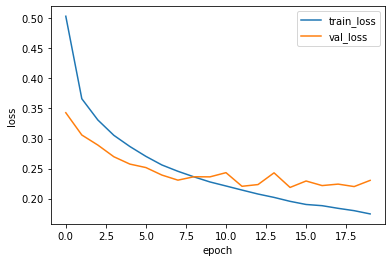

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

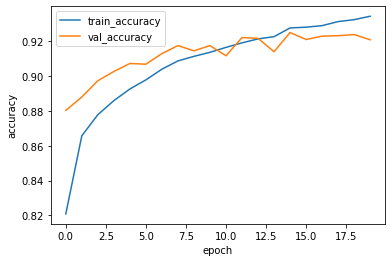

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
import tensorflow as tf
weights = tf.ones([3,3,1,1])
X = tf.ones([1,32,32,1])
Y = tf.nn.conv2d(X, weights, [1, 1, 1, 1], "VALID")
print(Y.shape)
print(tf.__version__)